# 데이터 전처리 후 머신러닝
## 메인 메뉴 featurer 추가

In [3]:
from autogluon.tabular import TabularPredictor

In [4]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [5]:
base_path = 'data/'

train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
submission = pd.read_csv(base_path + 'sample_submission.csv')
test.shape

(50, 10)

## 데이터 전처리
- 일자 -> 월 데이터 추출
- 요일 -> 숫자 형식으로 변환

train data 전처리

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
train['월'] =  train['일자'].str[5:7]
train['월'] = train['월'].astype(int)
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1


In [8]:
no = 1
for dow in '월화수목금토':
    train.loc[train['요일'] == dow, 'dow'] = no
    no += 1
    
train[['요일', 'dow']].value_counts()

요일  dow
목   4.0    244
금   5.0    241
월   1.0    241
화   2.0    240
수   3.0    239
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  월               1205 non-null   int32  
 13  dow             1205 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 127.2+ KB


In [10]:
train_set = train[['월', 'dow', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식메뉴', '석식메뉴', '중식계', '석식계']].copy()
train_set[['현본사소속재택근무자수', 'dow']] = train_set[['현본사소속재택근무자수', 'dow']].astype(int)
train_set

,월,dow,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2,1,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2,2,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2,3,2601,56,180,111,0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2,4,2601,104,220,355,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2,5,2601,278,181,34,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,1,3,2983,75,198,4,391,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,1,4,2983,92,231,462,351,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,1,5,2983,255,248,1,303,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,1,1,2983,107,153,616,327,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


test data 전처리

In [11]:
test['월'] =  test['일자'].str[5:7]
test['월'] = test['월'].astype(int)
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치,2
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치,2
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치,2
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치,2
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지,2


In [12]:
no = 1
for dow in '월화수목금토':
    test.loc[test['요일'] == dow, 'dow'] = no
    no += 1
    
test['dow'] = test['dow'].astype(int)
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,dow
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,3
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,4
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,5
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치,2,3
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치,2,4
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치,2,5
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치,2,1
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지,2,2


In [13]:
test_set = test[['월', 'dow', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식메뉴', '석식메뉴']].copy()
test_set[['현본사소속재택근무자수', 'dow']] = test_set[['현본사소속재택근무자수', 'dow']].astype(int)
test_set

,월,dow,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,1,3,2983,88,182,5,358,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,1,4,2983,104,212,409,348,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,1,5,2983,270,249,0,294,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2,1,2924,108,154,538,322,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2,2,2924,62,186,455,314,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2,3,2924,59,199,5,286,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2,4,2924,61,211,476,288,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2,5,2924,169,252,0,256,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2,1,2924,88,174,690,329,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2,2,2924,94,183,542,329,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


## 메인메뉴 값 추출하기

In [14]:
train_set


,월,dow,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2,1,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2,2,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2,3,2601,56,180,111,0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2,4,2601,104,220,355,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2,5,2601,278,181,34,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,1,3,2983,75,198,4,391,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,1,4,2983,92,231,462,351,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,1,5,2983,255,248,1,303,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,1,1,2983,107,153,616,327,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [15]:
# pd.concat(train_set['중식메뉴'].str.split()[0])
d = pd.DataFrame(train_set['중식메뉴'].str.split()[0])
d = d[d[0].str.contains('\(')==False]
d.reset_index().drop(columns='index').T

,0,1,2,3,4,5,6
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치


In [16]:
'(쌀,(쇠, (닭'

'(쌀,(쇠, (닭'

In [17]:
aaa = train[train['중식메뉴'].str.contains('\(')]
aaa[~aaa['중식메뉴'].str.contains('\(쌀|\(쇠|\(닭|\(낙|\(김|\(고|\(배')]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,dow
1109,2020-08-31,월,2989,183,163,648,464.0,모닝롤/치즈베이글 우유/주스 계란후라이 누룽지탕/흑미밥 매운소고기국 건파래볶음 양상...,쌀밥/흑미밥/찰현미밥 황태콩나물해장국 (New)궁보계정 시금치프리타타 가지고추장무침...,흑미밥 김치두부국 제육간장불고기 감자채카레볶음 통고추쌈장무침 포기김치,1243.0,649.0,8,1.0
1111,2020-09-02,수,3132,78,155,0,522.0,모닝롤/단호박피자빵 우유/주스 계란후라이 누룽지탕/흑미밥 참치김치찌개 우엉채조림 양...,쌀밥/흑미밥/찰현미밥 (New)오리들깨탕 냉족발야채무침 (New)수제오미산적 부추샐...,흑미밥 미역국 닭볶음탕 돈채표고버섯볶음 꼬들단무지무침 포기김치/요구르트,1006.0,390.0,9,3.0
1118,2020-09-11,금,3132,211,259,2,376.0,모닝롤/프레즐 우유/주스 계란후라이 미역죽/흑미밥 근대국 몽골식돈육볶음 양상추샐러드...,쌀밥/흑미밥/찰현미밥 잔치국수 (New)수제어묵소세지핫도그 순대채소볶음 참나물두부무...,흑미밥 소고기무국 삼치구이 마늘쫑메추리알조림 매콤시래기된장지짐 포기김치,661.0,287.0,9,5.0
1121,2020-09-16,수,3132,72,229,0,361.0,모닝롤/절편 우유/주스 계란후라이 누룽지탕/흑미밥 우거지국 콩나물무침 양상추샐러드 ...,쌀밥/흑미밥/찰현미밥 유부장국 목살찹스테이크 (New)빠네파스타 할라피뇨채소피클 포...,흑미밥 매운닭개장 소고기계란장조림 타꼬야끼 열무나물 포기김치,953.0,362.0,9,3.0
1122,2020-09-17,목,3132,84,245,588,368.0,모닝롤/야채샌드위치 우유/주스 계란후라이 흑임자죽/흑미밥 고추장찌개 야채소시지전*케...,쌀밥/흑미밥/찰현미밥 감자수제비국 쇠고기낙지볶음 채소탕수(연근/브로콜리/단호박) 건...,흑미밥 스팸김치찌개 수제돈까스 수제마늘바게트 가지무침 깍두기,797.0,504.0,9,4.0
1123,2020-09-18,금,3132,241,281,1,310.0,모닝롤/치즈볼 우유/주스 계란후라이 게살죽/흑미밥 매운어묵국 깻잎순볶음 양상추샐러드...,쌀밥/병아리콩/찰현미밥 버섯국 (New)고추마요치킨 비엔나떡조림 통도라지고추장구이 ...,흑미밥 콩비지찌개 갈치카레구이 어묵잡채 오이보트샐러드 포기김치,570.0,256.0,9,5.0
1133,2020-10-08,목,3008,88,225,734,249.0,모닝롤/야채샌드위치 우유/주스 계란후라이 누룽지탕/흑미밥 순두부백탕 고기완자전*케찹...,쌀밥/렌틸콩밥/찰현미밥 우거지된장국 (New)하와이언치즈함박스테이크 닭살겨자냉채 부...,흑미밥 쇠고기무국 시래기삼치조림 계란찜 사과청경채무침 포기김치,923.0,345.0,10,4.0
1136,2020-10-14,수,3008,68,267,3,171.0,모닝롤/라즈베리빵 우유/주스 계란후라이 바지락죽/흑미밥 참치김치찌개 스팸구이 양상추...,쌀밥/흑미밥/찰현미밥 두부된장찌개 (New)해물보쌈&채소숙회 츄러스채소맛탕 도라지나...,흑미밥 어묵매운탕 등심돈까스 꽁치한마리구이*와사비장 얼갈이나물 포기김치,797.0,382.0,10,3.0
1137,2020-10-15,목,3008,97,269,898,175.0,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/흑미밥 들깨무채국 감자맛살볶음 양...,쌀밥/흑미밥/찰현미밥 홍합살무국 돈갈비양념구이 두반장가지볶음 청경채무침 포기김치/(...,(New)케일쌈밥*씨앗쌈장 미역국 대패삼겹숙주볶음 연두부계란찜 상추무침 포기김치,793.0,400.0,10,4.0
1141,2020-10-21,수,3008,107,239,6,160.0,모닝롤/흑미쌀찐빵 우유/주스 계란후라이 누룽지탕/흑미밥 근대국 파래김*양념장 연두부...,쌀밥/흑미밥/찰현미밥 미역미소시루국 (New)연어스테이크 차돌비빔국수 토마토계란볶음...,흑미밥 고추장찌개 소불고기 진미채무말랭이무침 햄감자볶음 포기김치/열무김치볶음,887.0,336.0,10,3.0


In [18]:
lunch_menu_list =[]

for no in range (0, 1205):
    menu = pd.DataFrame(train_set['중식메뉴'].str.split()[no])
#     menu = menu[~menu[0].str.contains('\(쌀|\(쇠|\(닭|\(낙|\(김|\(고|\(배')]


    lunch_menu_list.append(menu.reset_index().drop(columns='index').T)
    
lunch_menu_list

[        0             1      2     3          4    5      6     7     8  \
 0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  오징어찌개  쇠불고기  (쇠고기:호주산)  계란찜  청포묵무침  요구르트  포기김치   
 
                9  
 0  (배추,고추가루:국내산)  ,
         0             1     2      3        4      5     6      7  \
 0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이   
 
                8  
 0  (배추,고추가루:국내산)  ,
       0             1     2     3          4       5      6     7     8  \
 0  카레덮밥  (쌀,현미흑미:국내산)  팽이장국  치킨핑거  (닭고기:국내산)  쫄면야채무침  견과류조림  요구르트  포기김치   
 
                9  
 0  (배추,고추가루:국내산)  ,
         0             1      2      3    4      5     6     7              8
 0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치  (배추,고추가루:국내산),
         0             1   2       3           4     5      6     7     8  \
 0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  떡국  돈육씨앗강정  (돼지고기:국내산)  우엉잡채  청경채무침  요구르트  포기김치   
 
                9  
 0  (배추,고추가루:국내산)  ,
         0             1     2       3       4        5     6     7      

In [19]:
lunch_menu_list =[]

for no in range (0, 1205):
    menu = pd.DataFrame(train_set['중식메뉴'].str.split()[no])
    menu = menu[~menu[0].str.contains(
        '\(쌀|\(쇠|\(소|\(닭|\(낙|\(김|\(고|\(굴|\(배|\(목|\(대|\(두|\(등|\(오|\(우|\(돈|\(장|\(돼|\(찹|\(열|\(갈|\(코|\(양|\(황|\(동|\(열|\(주|\(차|\(훈|\(북|\(콩|\(무')]


    lunch_menu_list.append(menu.reset_index().drop(columns='index').T)
    
lunch_menu_list

[        0      1     2    3      4     5     6
 0  쌀밥/잡곡밥  오징어찌개  쇠불고기  계란찜  청포묵무침  요구르트  포기김치,
         0     1      2        3      4     5      6
 0  쌀밥/잡곡밥  김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이,
       0     1     2       3      4     5     6
 0  카레덮밥  팽이장국  치킨핑거  쫄면야채무침  견과류조림  요구르트  포기김치,
         0      1      2    3      4     5     6
 0  쌀밥/잡곡밥  쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치,
         0   1       2     3      4     5     6
 0  쌀밥/잡곡밥  떡국  돈육씨앗강정  우엉잡채  청경채무침  요구르트  포기김치,
         0     1       2       3        4     5     6
 0  쌀밥/잡곡밥  시래기국  훈제오리구이  도토리묵무침  쌈무/양파절임  요구르트  포기김치,
         0    1        2     3     4     5     6
 0  쌀밥/잡곡밥  꽃게탕  돈육굴소스볶음  옥수수전  유채나물  요구르트  포기김치,
         0     1      2        3      4     5     6
 0  쌀밥/잡곡밥  시금치국  닭감자조림  연두부*양념장  콩나물무침  요구르트  포기김치,
         0      1    2        3    4     5     6
 0  쌀밥/잡곡밥  쇠고기무국  탕수어  오징어숙회무침  취나물  요구르트  포기김치,
         0      1       2       3      4     5     6
 0  쌀밥/잡곡밥  냉이된장국  쇠고기장조림  통도라지구이  치커리

In [20]:
lunch_menu_df = pd.concat(lunch_menu_list)
lunch_menu_df = lunch_menu_df.reset_index().drop(columns='index')
lunch_menu_df.columns = ['밥', '국', '반찬1', '반찬2', '반찬3', '반찬4', '반찬5', '반찬6']
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN
...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN


In [21]:
lunch_menu_df.describe()

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
count,1205,1205,1205,1205,1205,1204,193,10
unique,75,272,389,463,446,105,94,9
top,쌀밥/잡곡밥,맑은국,오징어볶음,계란말이,오이무침,포기김치,포기김치,고추가루:중국산)
freq,879,46,32,27,34,789,39,2


In [22]:
lunch_menu_df.isnull().sum()

밥         0
국         0
반찬1       0
반찬2       0
반찬3       0
반찬4       1
반찬5    1012
반찬6    1195
dtype: int64

In [23]:
lunch_menu_df[~lunch_menu_df['반찬3'].isnull()]

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN
...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN


In [24]:
lunch_menu_df[~lunch_menu_df['반찬4'].isnull()]

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN
...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN


메인메뉴 알아보기

<AxesSubplot:>

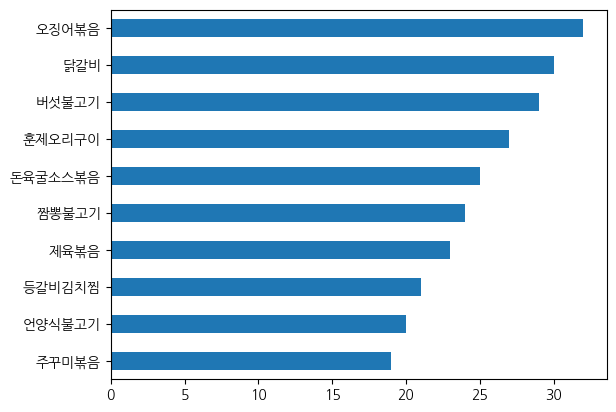

In [25]:
lunch_menu_df['반찬1'].value_counts().head(10).sort_values().plot.barh()

In [26]:
lunch_menu_df['반찬1'].nunique()

389

In [27]:
lunch_menu_df[lunch_menu_df['반찬1'].str.contains('구이')]['반찬1'].value_counts()

훈제오리구이        27
갈치구이          13
굴비구이          12
닭오븐구이          8
고구마치즈구이        6
고등어구이          4
꽁치한마리구이        3
삼겹살오븐구이        3
삼겹살구이          3
LA갈비구이         2
새송이너비아니구이      2
삼치구이           2
조기구이           2
꽁치오븐구이         2
훈제오리구이/쌈무      1
자반고등어구이        1
꽁치한마리레몬구이      1
돈갈비양념구이        1
장어고추장양념구이      1
바베큐장각오븐구이      1
적어구이&양념장       1
닭다리바베큐오븐구이     1
열기어구이          1
삼겹살더덕고추장구이     1
장어구이*소스        1
감자치즈구이         1
삼치된장구이         1
목살데리야끼구이       1
새송이떡갈비구이       1
닭데리야끼구이        1
꽁치레몬구이         1
삼치양념구이         1
꽁치구이           1
너비아니구이         1
통감자오븐구이        1
고등어구이*와사비장     1
Name: 반찬1, dtype: int64

In [28]:
lunch_menu_df[lunch_menu_df['반찬1'].str.contains('볶음')]['반찬1'].value_counts()

오징어볶음        32
돈육굴소스볶음      25
제육볶음         23
주꾸미볶음        19
닭볶음탕         18
             ..
콩나물제육볶음       1
순대볶음          1
소고기숙주나물볶음     1
돼지고기유자청볶음     1
매운소고기낙지볶음     1
Name: 반찬1, Length: 63, dtype: int64

In [29]:
lunch_menu_df[lunch_menu_df['반찬1'].str.contains('고기')]['반찬1'].value_counts()

버섯불고기          29
짬뽕불고기          24
언양식불고기         20
소불고기           15
소고기장조림         11
쇠고기장조림         11
쇠고기낙지볶음        10
소고기숙주볶음         9
쇠고기숙주볶음         9
돈육간장불고기         7
오리불고기           7
소고기낙지볶음         6
오리대패불고기         4
소고기불고기          4
쇠불고기            4
돈육고추장불고기        3
언양식불고기*양파채      3
오삼불고기           3
제육고추장불고기        2
쇠고기단호박조림        2
콩나물파채불고기        2
만가닥버섯불고기        2
콩나물불고기          2
고추장불고기          2
소고기버섯볶음         2
쇠고기당면볶음         1
고기완자전           1
돼지간장불고기         1
매운소불고기          1
오리고추장불고기        1
매운쇠고기버섯볶음       1
쭈삼불고기           1
쇠고기버섯볶음         1
소고기브로컬리볶음       1
바싹불고기*양파초절임     1
우엉불고기           1
오리양념불고기*쌈무      1
돼지고기유자청볶음       1
돈육콩나물불고기        1
소고기숙주나물볶음       1
쇠고기모듬장조림        1
쇠고기볶음           1
쇠불고기/잡채         1
돈간장불고기          1
쇠고기불고기          1
매운소고기낙지볶음       1
Name: 반찬1, dtype: int64

In [30]:
lunch_menu_df['중식계'] = train_set['중식계']
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN,1039.0
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN,867.0
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN,1017.0
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN,978.0
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN,925.0
...,...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN,1093.0
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN,832.0
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN,579.0
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN,1145.0


<AxesSubplot:ylabel='반찬1'>

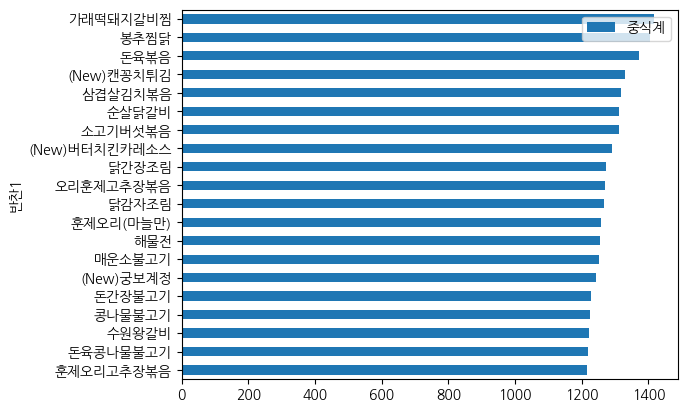

In [31]:
lunch_menu_df.groupby('반찬1').agg({'중식계' : 'mean'}
                                ).sort_values(by='중식계', ascending=True
                                             ).tail(20).plot.barh()

In [32]:
lunch_menu_df[lunch_menu_df['반찬1'] == '가래떡돼지갈비찜']

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계
490,쌀밥/잡곡밥,봄동된장국,가래떡돼지갈비찜,콩나물겨자채,참나물무침,포기김치,NaN,NaN,1417.0


In [33]:
train_set[train_set['중식메뉴'].str.contains('가래떡돼지갈비찜')]

,월,dow,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
490,1,1,2655,70,192,454,0,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 가래떡돼지갈비찜 콩나물겨자채 참나물무침 ...,쌀밥/잡곡밥 (쌀:국내산) 청국장찌개 류산슬 생선커틀릿*탈탈소스 단배추나물 ...,1417.0,689.0


In [34]:
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('돈갈비|보쌈|돈삼겹|깐풍육|족발|돈수육|삼겹살|등갈비|오향장육|목살|동파|제육|바베큐|탕수육|돈육|돼지'),
                 '메인메뉴범주'] = '돼지'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('소갈비|쇠고기|육전|불고기|차돌|소고기|떡갈비|LA'),
                 '메인메뉴범주'] = '소'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('닭|장각|치킨|유린기|깐풍기|교촌'),
                 '메인메뉴범주'] = '닭'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('오리'),
                 '메인메뉴범주'] = '오리'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('해물|굴비|새우|고등어|적어|생선|삼치|갈치|가자미|오징어|코다리|탕수어|꽁치'),
                 '메인메뉴범주'] = '해물'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('장어|주꾸미|류산슬|유산슬|낙지|쭈꾸미'),
                 '메인메뉴범주'] = '특해물'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('돈까스|수제|함박|미트볼'),
                 '메인메뉴범주'] = '돈까스'
lunch_menu_df.loc[lunch_menu_df['반찬1'].str.contains('떡'),
                 '메인메뉴범주'] = '떡'
lunch_menu_df['메인메뉴범주'] = lunch_menu_df['메인메뉴범주'].fillna('기타')
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN,1039.0,소
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN,867.0,해물
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN,1017.0,닭
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN,978.0,특해물
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN,925.0,돼지
...,...,...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN,1093.0,돈까스
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN,832.0,돼지
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN,579.0,닭
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN,1145.0,소


In [35]:
lunch_menu_df[lunch_menu_df['메인메뉴범주'] == '기타']

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
10,낙지비빔밥,유부장국,고구마치즈구이,해초무침,요구르트,요구르트,포기김치,NaN,910.0,기타
14,비빔밥,팽이장국,소세지피망볶음,맛탕,귤,요구르트,포기김치,NaN,1022.0,기타
61,곤드레밥,무채국,모둠장조림,온두부,실곤약초무침,볶은김치,NaN,NaN,964.0,기타
74,쌀밥/잡곡밥,한방갈비탕,꼬지삼색전,오징어숙회무침,치커리생채,석박지,NaN,NaN,1107.0,기타
81,쌀밥/잡곡밥,오이미역냉국,모둠장조림,두부구이,실곤약초무침,포기김치,NaN,NaN,850.0,기타
...,...,...,...,...,...,...,...,...,...,...
1146,쌀밥/흑미밥/찰현미밥,삼계탕,고기완자전,방풍나물,채소스틱&쌈장/석박지,(New)수제토마토청에이드,양상추샐러드*유자D,NaN,791.0,기타
1156,쌀밥/흑미밥/찰현미밥,한방설렁탕,골뱅이채소무침,개성식메밀부침개,참나물무침,석박지/귤,양상추샐러드*오미자D,NaN,747.0,기타
1160,쌀밥/찰보리밥/찰현미밥,미소장국,알리오올리오파스타,두부고기양념찜,해파리냉채,겉절이김치/미니버거,양상추샐러드*딸기D,NaN,784.0,기타
1161,쌀밥/흑미밥/찰현미밥,순두부찌개,(,New)요거닭,비엔나채소볶음,오이쑥갓생채,포기김치/라면땅,양상추샐러드*매실D,774.0,기타


In [36]:
lunch_menu_df[lunch_menu_df['반찬1'] =='찹쌀밥']

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
356,<초복특식>,삼계탕,찹쌀밥,생야채&쌈장,수박,깍두기,NaN,NaN,918.0,기타
840,<초복특식>,삼계탕,찹쌀밥,생야채&쌈장,수박,수제석박지,NaN,NaN,856.0,기타


In [37]:
lunch_menu_df.groupby('메인메뉴범주').agg({'중식계':'mean'}).sort_values(by='중식계', ascending=False)
# lunch_menu_df['중식계'].mean() = 890

,중식계
메인메뉴범주,
오리,980.490909
소,979.756477
돼지,914.301158
특해물,883.073529
닭,864.632911
떡,852.000000
기타,850.871287
해물,827.043062
돈까스,823.120000


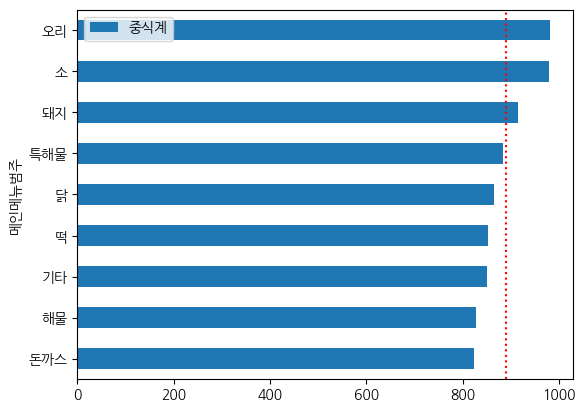

In [38]:
lunch_menu_df.groupby('메인메뉴범주').agg({'중식계':'mean'}).sort_values(by='중식계').plot.barh()
plt.axvline(lunch_menu_df['중식계'].mean(), c='red', ls=':')

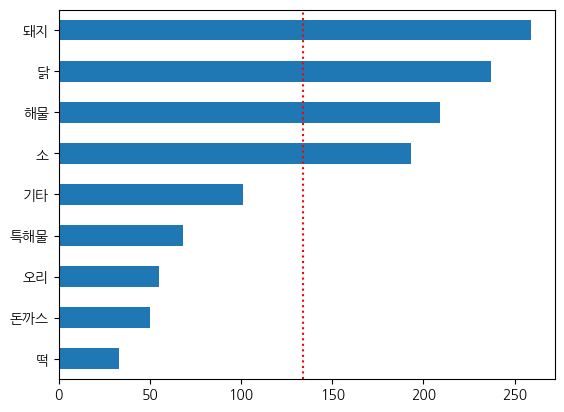

In [39]:
lunch_menu_df['메인메뉴범주'].value_counts().sort_values(ascending=True).plot.barh()
plt.axvline(lunch_menu_df['메인메뉴범주'].value_counts().mean(), c='r', ls=':')

In [40]:
lunch_menu_df[lunch_menu_df['메인메뉴범주'] == '오리']

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
5,쌀밥/잡곡밥,시래기국,훈제오리구이,도토리묵무침,쌈무/양파절임,요구르트,포기김치,NaN,1045.0,오리
30,쌀밥/잡곡밥,시금치국,훈제오리구이,연근땅콩조림,쌈무/부추생채,포기김치,NaN,NaN,757.0,오리
46,쌀밥/잡곡밥,시래기국,훈제오리구이,무쌈/양파절임,풋마늘초무침,포기김치,NaN,NaN,1225.0,오리
63,쌀밥/잡곡밥,매운어묵국,훈제오리구이,무쌈/양파절임,도토리묵무침,포기김치,NaN,NaN,1216.0,오리
97,쌀밥/잡곡밥,배추된장국,훈제오리구이,실곤약초무침,쌈무/야채스틱,포기김치,NaN,NaN,1142.0,오리
120,쌀밥/잡곡밥,꽃게탕,훈제오리냉채,동그랑땡전,콩자반,배추겉절이,NaN,NaN,816.0,오리
149,쌀밥/잡곡밥,된장찌개,오리고추장볶음,콩나물잡채,부추생채,알타리김치,NaN,NaN,758.0,오리
153,쌀밥/잡곡밥,어묵국,오리훈제고추장볶음,계란말이,애호박나물,포기김치,NaN,NaN,1271.0,오리
184,콩나물밥,가쯔오장국,훈제오리/무쌈,양파절임,부추겉절이,포기김치,NaN,NaN,1006.0,오리
207,쌀밥/잡곡밥,순두부찌개,훈제오리구이,참치야채전,무쌈말이,포기김치,NaN,NaN,1110.0,오리


In [41]:
lunch_menu_df[lunch_menu_df['메인메뉴범주'] == '닭'].sort_values(by='중식계')

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
955,쌀밥/잡곡밥,배추된장국,닭볶음탕,부추깻잎전,양배추쌈*쌈장,포기김치,NaN,NaN,349.0,닭
310,쌀밥/잡곡밥,들깨미역국,닭갈비,생선까스*타르소스,무생채,포기김치,NaN,NaN,383.0,닭
470,쌀밥/잡곡밥,어묵국,닭볶음탕,연근땅콩조림,파래김*양념,배추겉절이,NaN,NaN,394.0,닭
1056,마파두부덮밥,유부장국,레몬유린기,두릅소고기샐러드,오이지무침,배추겉절이,NaN,NaN,450.0,닭
951,쌀밥/잡곡밥,오징어국,치킨핑거,애호박전,콩나물무침,조각케익,포기김치,NaN,462.0,닭
...,...,...,...,...,...,...,...,...,...,...
1164,쌀밥/흑미밥/찰현미밥,어묵매운탕,(New)버터치킨카레소스,등심돈까스,솎음열무나물,포기김치/홍시,양상추샐러드*자몽D,NaN,1292.0,닭
269,쌀밥/잡곡밥,어묵국,순살닭갈비,동그랑땡전,치커리사과무침,포기김치,NaN,NaN,1311.0,닭
250,쌀밥/잡곡밥,냉이된장찌개,닭갈비,감자전,단배추나물,포기김치,NaN,NaN,1319.0,닭
21,쌀밥/잡곡밥,콩나물국,닭갈비,모둠묵*양념장,톳두부무침,포기김치,NaN,NaN,1326.0,닭


#### 국 알아보기

In [42]:
lunch_menu_df['국'].nunique()

272

<AxesSubplot:>

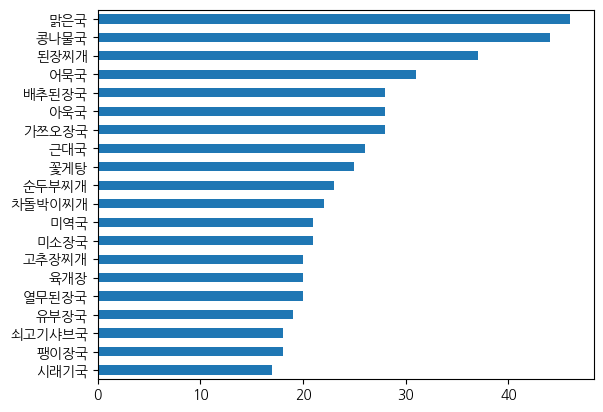

In [43]:
lunch_menu_df['국'].value_counts().head(20).sort_values().plot.barh()

In [44]:
lunch_menu_df[lunch_menu_df['국'].str.contains('곤드레')]

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주
1142,쌀밥/,곤드레밥/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,겉절이김치/양념장,견과류샐러드*요거트D,799.0,기타


In [45]:
train[train['중식메뉴'].str.contains('인도커리')]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,dow
1182,2020-12-17,목,2990,226,184,653,334.0,모닝롤/프레즐 우유/주스 계란후라이 누룽지/흑미밥 꽃게된장국 두부양념찜 양상추샐러드...,쌀밥/흑미밥/찰현미밥 (New)인도커리&난 (New)탄두리치킨 문어꽈리고추조림 세발...,흑미밥 순두부백탕*양념장 제육간장불고기 매운감자조림 (New)배추오이흑임자무침 포기김치,1096.0,438.0,12,4.0


In [46]:
lunch_menu_df.loc[lunch_menu_df['국']
                  .str.contains('김치|장국|떡국|호박|청국|근대|만두|콩|시래기|버섯|배추|감자양파|미소시루|팽이|김칫|옥수수|크림스프|토란|감자국|미역미|옹심이|미소국|유부|가쯔오|우거지|계란|수제비|얼갈|연두부|시금치|무채|미역국|들깨|냉국|도토리|우무묵|순두부|아욱국|된장|콩나물|부대|고추|쑥|맑은|쪽파|들깨탕'),
                 '국범주'] = '노멀'
lunch_menu_df.loc[lunch_menu_df['국'].str.contains('오징어|꽃게|대구|황태|불낙찌개|바지락|조개|짬뽕|나가사끼|제첩|조갯|미니짬뽕|홍합|동태|돈신|북엇|새우|북어|알탕|어묵'),
                 '국범주'] = '해산물'
lunch_menu_df.loc[lunch_menu_df['국'].str.contains('쇠고기|차돌|사골우거지|순등뼈탕|나주|순대|닭|갈비|돼지|감자탕|설렁|소고기|육개장'),
                 '국범주'] = '고기국'
lunch_menu_df.loc[lunch_menu_df['국'].str.contains('냉메밀|국수|우동'),
                 '국범주'] = '국수'
lunch_menu_df.loc[lunch_menu_df['국'].str.contains('한방갈비탕|삼계|백숙|인도커리|쌀찹'),
                 '국범주'] = '스페셜'
lunch_menu_df['국범주'] = lunch_menu_df['국범주'].fillna('기타')
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주,국범주
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN,1039.0,소,해산물
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN,867.0,해물,노멀
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN,1017.0,닭,노멀
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN,978.0,특해물,고기국
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN,925.0,돼지,노멀
...,...,...,...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN,1093.0,돈까스,노멀
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN,832.0,돼지,노멀
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN,579.0,닭,노멀
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN,1145.0,소,노멀


In [47]:
lunch_menu_df['국범주'].isnull().sum()

0

<AxesSubplot:>

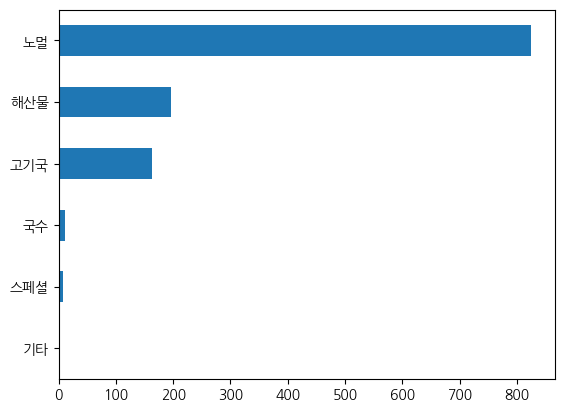

In [48]:
lunch_menu_df['국범주'].value_counts().sort_values(ascending=True).plot.barh()

In [49]:
lunch_menu_df['중식계']

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1200    1093.0
1201     832.0
1202     579.0
1203    1145.0
1204    1015.0
Name: 중식계, Length: 1205, dtype: float64

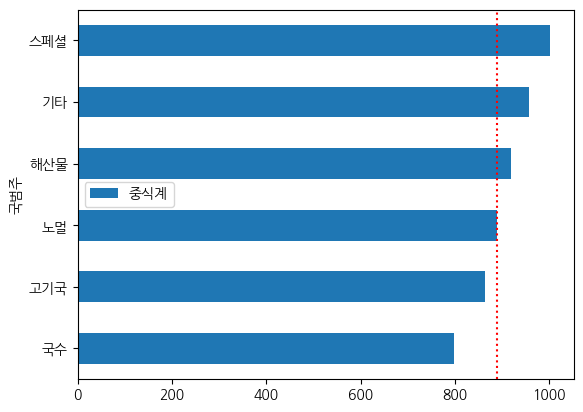

In [50]:
lunch_menu_df.groupby('국범주').agg({'중식계':'mean'}).sort_values(by='중식계').plot.barh()
plt.axvline(lunch_menu_df['중식계'].mean(), c='r', ls=':')

In [51]:
lunch_menu_df[lunch_menu_df['밥'].str.contains('소불고기|불고기|낙지|김치필라프')]['밥'].value_counts()

낙지비빔밥          6
소불고기덮밥         3
낙지볶음밥          1
불고기덮밥          1
김치필라프          1
불고기비빔밥         1
낙지비빔밥*계란후라이    1
Name: 밥, dtype: int64

In [52]:
lunch_menu_df['밥'].value_counts()

쌀밥/잡곡밥         879
쌀밥/흑미밥/찰현미밥     74
콩나물밥            23
카레덮밥            18
나물비빔밥           15
              ... 
건강비빔밥*약고추장       1
새우날치알볶음밥         1
소고기콩나물밥*양념       1
닭살카레라이스          1
전주비빔밥*약고추장       1
Name: 밥, Length: 75, dtype: int64

<AxesSubplot:ylabel='밥'>

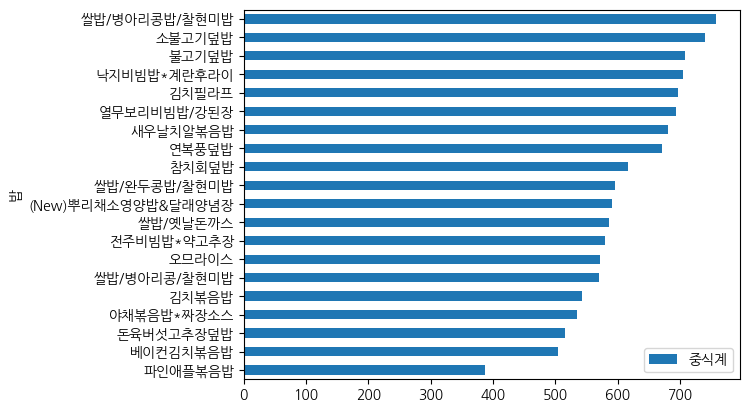

In [53]:
lunch_menu_df.groupby('밥').agg({'중식계':'mean'}).sort_values(by='중식계',
                                                           ascending=True).head(20).plot.barh()

In [54]:
dinner_menu_list = []
for no in range(0, 1162):
    menu = pd.DataFrame(train[train['석식계'] > 0].reset_index()['석식메뉴'].str.split()[no])
    menu = menu[~menu[0].str.contains('\(쌀|\(쇠|\(소|\(닭|\(지|\(2|\(명|찜\)|\(낙|\(김|\(삼|\(고|\(굴|\(배|\(목|\(대|\(두|\(등|\(오|\(우|\(돈|\(장|\(돼|\(찹|\(열|\(갈|\(코|\(양|\(황|\(동|\(열|\(주|\(차|\(훈|\(북|\(콩|\(무')]
    
    dinner_menu_list.append(menu.reset_index().drop(columns='index').T)

dinner_menu_list

[        0    1        2     3      4     5
 0  쌀밥/잡곡밥  육개장  자반고등어구이  두부조림  건파래무침  포기김치,
           0    1    2       3    4     5
 0  콩나물밥*양념장  어묵국  유산슬  아삭고추무침  바나나  포기김치,
         0      1       2    3        4     5
 0  쌀밥/잡곡밥  청국장찌개  황태양념구이  고기전  새송이버섯볶음  포기김치,
           0   1       2     3    4     5
 0  미니김밥*겨자장  우동  멕시칸샐러드  군고구마  무피클  포기김치,
         0       1    2        3      4     5
 0  쌀밥/잡곡밥  차돌박이찌개  닭갈비  감자소세지볶음  콩나물무침  포기김치,
        0    1    2      3   4     5
 0  참치회덮밥  맑은국  군만두  과일샐러드  락교  포기김치,
         0       1     2     3      4    5
 0  쌀밥/잡곡밥  김치콩나물국  미니함박  어묵볶음  물파래무침  깍두기,
         0      1       2      3       4     5
 0  쌀밥/잡곡밥  홍합미역국  등갈비김치찜  임연수구이  브로컬리초장  포기김치,
         0     1     2       3     4     5
 0  쌀밥/잡곡밥  된장찌개  쇠불고기  해파리겨자채  봄동무침  포기김치,
           0    1      2      3    4     5
 0  볶음밥*자장소스  맑은국  새우또띠아  쨔샤이무침  요플레  포기김치,
         0      1     2      3    4     5
 0  쌀밥/잡곡밥  순두부찌개  명태조림  감자채볶음  쌈만두  포기김치,
         0    1    2     3    4    5
 0

In [55]:
dinner_menu_df = pd.concat(dinner_menu_list)
dinner_menu_df = dinner_menu_df.reset_index().drop(columns='index')
dinner_menu_df.columns = ['밥', '국', '반찬1', '반찬2', '반찬3', '반찬4', '반찬5', '반찬6']
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN
...,...,...,...,...,...,...,...,...
1157,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN
1158,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN
1159,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN
1160,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN


In [56]:
dinner_menu_df = dinner_menu_df.drop(index=565)
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN
...,...,...,...,...,...,...,...,...
1157,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN
1158,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN
1159,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN
1160,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN


In [57]:
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('돈갈비|보쌈|돈삼겹|깐풍육|족발|돈수육|삼겹살|등갈비|오향장육|목살|동파|제육|바베큐|탕수육|돈육|돼지'),
                 '메인메뉴범주'] = '돼지'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('소갈비|쇠고기|육전|불고기|차돌|소고기|떡갈비|LA'),
                 '메인메뉴범주'] = '소'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('닭|장각|치킨|유린기|깐풍기|교촌'),
                 '메인메뉴범주'] = '닭'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('오리'),
                 '메인메뉴범주'] = '오리'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('해물|굴비|새우|고등어|황태|적어|명태|참치|생선|삼치|갈치|가자미|오징어|코다리|탕수어|꽁치'),
                 '메인메뉴범주'] = '해물'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('장어|주꾸미|류산슬|유산슬|낙지|쭈꾸미'),
                 '메인메뉴범주'] = '특해물'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('돈까스|수제|함박|미트볼'),
                 '메인메뉴범주'] = '돈까스'
dinner_menu_df.loc[dinner_menu_df['반찬1'].str.contains('떡'),
                 '메인메뉴범주'] = '떡'
dinner_menu_df['메인메뉴범주'] = dinner_menu_df['메인메뉴범주'].fillna('기타')
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,메인메뉴범주
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN,해물
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN,특해물
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN,해물
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN,기타
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN,닭
...,...,...,...,...,...,...,...,...,...
1157,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN,기타
1158,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN,해물
1159,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN,돈까스
1160,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN,특해물


In [58]:
dinner_menu_df['메인메뉴범주'].value_counts()

해물     275
기타     264
돼지     179
닭      157
소      100
돈까스     70
떡       51
특해물     50
오리      15
Name: 메인메뉴범주, dtype: int64

In [59]:
dinner_menu_df.loc[dinner_menu_df['국']
                  .str.contains('김치|장국|떡국|호박|청국|근대|만두|콩|시래기|버섯|배추|감자양파|미소시루|팽이|김칫|옥수수|크림스프|토란|감자국|미역미|옹심이|미소국|유부|가쯔오|우거지|계란|수제비|얼갈|연두부|시금치|무채|미역국|들깨|냉국|도토리|우무묵|순두부|아욱국|된장|콩나물|부대|고추|쑥|맑은|쪽파|들깨탕'),
                 '국범주'] = '노멀'
dinner_menu_df.loc[dinner_menu_df['국'].str.contains('오징어|꽃게|대구|황태|불낙찌개|바지락|조개|짬뽕|나가사끼|제첩|조갯|미니짬뽕|홍합|동태|돈신|북엇|새우|북어|알탕|어묵'),
                 '국범주'] = '해산물'
dinner_menu_df.loc[dinner_menu_df['국'].str.contains('쇠고기|차돌|사골우거지|순등뼈탕|나주|순대|닭|갈비|돼지|감자탕|설렁|소고기|육개장'),
                 '국범주'] = '고기국'
dinner_menu_df.loc[dinner_menu_df['국'].str.contains('냉메밀|국수|우동'),
                 '국범주'] = '국수'
dinner_menu_df.loc[dinner_menu_df['국'].str.contains('한방갈비탕|삼계|백숙|인도커리|쌀찹'),
                 '국범주'] = '스페셜'
dinner_menu_df['국범주'] = dinner_menu_df['국범주'].fillna('기타')
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,메인메뉴범주,국범주
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN,해물,고기국
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN,특해물,해산물
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN,해물,노멀
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN,기타,국수
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN,닭,고기국
...,...,...,...,...,...,...,...,...,...,...
1157,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN,기타,국수
1158,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN,해물,고기국
1159,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN,돈까스,노멀
1160,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN,특해물,노멀


In [60]:
dinner_menu_df['국범주'].value_counts()

노멀     650
고기국    164
국수     159
해산물    151
기타      36
스페셜      1
Name: 국범주, dtype: int64

In [61]:
train.iloc[550:590]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,dow
550,2018-04-26,목,2714,69,293,266,0.0,모닝롤/단호박샌드 우유/주스 스크램블에그 팥죽/쌀밥 (쌀:국내산) 꽃게탕 콩자반...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 닭매운찜 호박전 쑥갓두부무침 포기김치 (...,유부초밥 우동 표고버섯탕수육 참치샐러드 음료 포기김치 (김치:국내산),761.0,483.0,4,4.0
551,2018-04-27,금,2714,205,304,40,0.0,모닝롤/와플 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 냉이된장국 진미채무침...,쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 삼겹살구이 쫄면무침 상추부추생채 알타리...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 주꾸미떡볶음 두부카프레제 아삭고추무침 ...,674.0,380.0,4,5.0
552,2018-04-30,월,2714,646,180,107,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 북어해장국 애호...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 닭데리야끼조림 꽃맛살볶음 치커리무침 포기김...,쌀밥/잡곡밥 (쌀:국내산) 육개장 해물누룽지탕 부추전 김자반볶음 포기김치 (...,629.0,317.0,4,1.0
553,2018-05-02,수,2721,110,247,0,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 떡국 숙주나...,김치제육덮밥 유부장국 양장피잡채 오꼬노미야끼 오렌지 알타리김치 (김치:국내산),쌀밥/잡곡밥 (쌀:국내산) 올갱이아욱국 소고기버섯볶음 깐풍연근 셀프무쌈말이 ...,1137.0,535.0,5,3.0
554,2018-05-03,목,2721,102,296,332,0.0,모닝롤/바나나샌드 우유/주스 스크램블에그 참치죽/쌀밥 (쌀:국내산) 호밧젓국찌개 ...,쌀밥/잡곡밥 (쌀:국내산) 도토리묵냉국 수제돈까스*칠리소스 어묵볶음 오이미역무...,김밥 (쌀:국내산) 잔치국수 해물떡볶이 만두/고구마튀김 감자샐러드 포기김치 ...,883.0,436.0,5,4.0
555,2018-05-04,금,2721,241,284,57,0.0,모닝롤/크로와상 우유/주스 계란후라이 새우살죽/쌀밥 (쌀:국내산) 콩나물김치국 ...,쌀밥/잡곡밥 (쌀:국내산) 무청된장국 콩나물제육볶음 임연수구이 취나물무침 포...,쌀밥/잡곡밥 (쌀:국내산) 감자국 쇠고기장조림 비엔나케찹볶음 세발나물 포기김...,630.0,440.0,5,5.0
556,2018-05-08,화,2721,133,231,590,0.0,모닝롤/핫도그 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 들깨미역국 아...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 버섯불고기 시금치프리타타 무생채 포기김...,쌀밥/잡곡밥 (쌀:국내산) 삼계국밥 삼치양념찜 당면계란만두 비름나물 알타리김...,1225.0,625.0,5,2.0
557,2018-05-09,수,2721,86,269,0,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 열무된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 탕수어 우엉잡채 도라지무침 열무김치 ...,쌀밥/잡곡밥 (쌀:국내산) 대구매운탕 언양식불고기 견과류조림 청경채겉절이 포...,919.0,413.0,5,3.0
558,2018-05-10,목,2721,80,291,369,0.0,모닝롤/옥수수샌드 우유/주스 스크램블에그 흑임자죽/쌀밥 (쌀:국내산) 매운버섯국 ...,쌀밥/잡곡밥 (쌀:국내산) 근대국 돈육굴소스볶음 해파리겨자채 양배추쌈*쌈장 ...,볶음밥*짜장소스 (쌀:국내산) 맑은국 사천식탕수육 하와이안샐러드 단무지 포기...,763.0,441.0,5,4.0
559,2018-05-11,금,2721,183,296,48,0.0,모닝롤/브라우니 우유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 북어계란국 오...,쌀밥/잡곡밥 (쌀:국내산) 소고기무국 오징어볶음 두부계란부침 미역줄기볶음 배...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 유린기 모듬묵샐러드 느타리호박볶음 포기김치...,602.0,445.0,5,5.0


# 메뉴 범주값 할당하기

#### 중식

In [62]:
temp = {'돈까스' : 1, '해물':2, '기타':3,'떡':4, '닭':5, '특해물':6, '돼지':7, '소':8, '오리':9}
for key, value in temp.items() :

    lunch_menu_df.loc[lunch_menu_df['메인메뉴범주'] == key , '반찬1_범주값'] = int(value)
    
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주,국범주,반찬1_범주값
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN,1039.0,소,해산물,8.0
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN,867.0,해물,노멀,2.0
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN,1017.0,닭,노멀,5.0
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN,978.0,특해물,고기국,6.0
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN,925.0,돼지,노멀,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN,1093.0,돈까스,노멀,1.0
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN,832.0,돼지,노멀,7.0
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN,579.0,닭,노멀,5.0
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN,1145.0,소,노멀,8.0


In [63]:
temp = {'기타' : 1, '국수':2, '고기국':3,'노멀':4, '해산물':5, '스페셜':6}
for key, value in temp.items() :
    lunch_menu_df.loc[lunch_menu_df['국범주'] == key , '국_범주값'] = int(value)
    
lunch_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,중식계,메인메뉴범주,국범주,반찬1_범주값,국_범주값
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,NaN,1039.0,소,해산물,8.0,5.0
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,NaN,867.0,해물,노멀,2.0,4.0
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,NaN,1017.0,닭,노멀,5.0,4.0
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,NaN,978.0,특해물,고기국,6.0,3.0
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,NaN,925.0,돼지,노멀,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D,NaN,1093.0,돈까스,노멀,1.0,4.0
1201,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D,NaN,832.0,돼지,노멀,7.0,4.0
1202,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D,NaN,579.0,닭,노멀,5.0,4.0
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D,NaN,1145.0,소,노멀,8.0,4.0


#### 석식

In [64]:
temp = {'돈까스' : 1, '해물':2, '기타':3,'떡':4, '닭':5, '특해물':6, '돼지':7, '소':8, '오리':9}
for key, value in temp.items() :

    dinner_menu_df.loc[dinner_menu_df['메인메뉴범주'] == key , '반찬1_범주값'] = int(value)
    
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,메인메뉴범주,국범주,반찬1_범주값
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN,해물,고기국,2.0
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN,특해물,해산물,6.0
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN,해물,노멀,2.0
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN,기타,국수,3.0
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN,닭,고기국,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1157,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN,기타,국수,3.0
1158,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN,해물,고기국,2.0
1159,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN,돈까스,노멀,1.0
1160,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN,특해물,노멀,6.0


In [65]:
temp = {'기타' : 1, '국수':2, '고기국':3,'노멀':4, '해산물':5, '스페셜':6}
for key, value in temp.items() :
    dinner_menu_df.loc[dinner_menu_df['국범주'] == key , '국_범주값'] = int(value)

dinner_menu_df = dinner_menu_df.reset_index().drop(columns='index')
dinner_menu_df

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,메인메뉴범주,국범주,반찬1_범주값,국_범주값
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN,해물,고기국,2.0,3.0
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN,특해물,해산물,6.0,5.0
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN,해물,노멀,2.0,4.0
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN,기타,국수,3.0,2.0
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN,닭,고기국,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,고들빼기무침,겉절이김치,NaN,NaN,기타,국수,3.0,2.0
1157,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,숙주나물당근무침,포기김치,NaN,NaN,해물,고기국,2.0,3.0
1158,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,참나물무침,갓김치/겉절이김치,NaN,NaN,돈까스,노멀,1.0,4.0
1159,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,오이선,포기김치,NaN,NaN,특해물,노멀,6.0,4.0


In [66]:
dinner_menu_df.to_csv('dinner(seperated).csv', index=False)

In [67]:
dinner_menu_df.isnull().sum()

밥             0
국             0
반찬1           0
반찬2           0
반찬3           0
반찬4           4
반찬5        1138
반찬6        1160
메인메뉴범주        0
국범주           0
반찬1_범주값       0
국_범주값         0
dtype: int64

## train_lunch, train_dinner 만들기

In [68]:
train_lunch = train_set.iloc[:,:7]
train_lunch.columns = ['월', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수']
train_lunch[['반찬1', '국']] = lunch_menu_df[['반찬1_범주값', '국_범주값']]
train_lunch = train_lunch[['월', '요일', '정원수', '휴가자수', 
                           '출장자수', '야근수', '재택근무자수', '국', '반찬1']]
train_lunch['중식계'] = train_set['중식계']
train_lunch = train_lunch.astype(int)
train_lunch

,월,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,국,반찬1,중식계
0,2,1,2601,50,150,238,0,5,8,1039
1,2,2,2601,50,173,319,0,4,2,867
2,2,3,2601,56,180,111,0,4,5,1017
3,2,4,2601,104,220,355,0,3,6,978
4,2,5,2601,278,181,34,0,4,7,925
...,...,...,...,...,...,...,...,...,...,...
1200,1,3,2983,75,198,4,391,4,1,1093
1201,1,4,2983,92,231,462,351,4,7,832
1202,1,5,2983,255,248,1,303,4,5,579
1203,1,1,2983,107,153,616,327,4,8,1145


In [69]:
= dinner_menu_df.reset_index().drop(columns='index')

SyntaxError: invalid syntax (3158466150.py, line 1)

In [70]:
temp_dinner.shape

NameError: name 'temp_dinner' is not defined

In [ ]:
train[train['일자'] == '2018-06-22']

In [71]:
temp_dinner = train[(train['석식계'] > 0) & 
                        (train['일자'] != '2018-06-22')].reset_index().drop(columns='index').copy()
train_dinner = temp_dinner[['월', 'dow', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수']].copy()
train_dinner.columns = ['월', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수']
train_dinner[['국', '반찬1']] = dinner_menu_df[['국_범주값', '반찬1_범주값']]

train_dinner['석식계'] = temp_dinner['석식계'].copy()
# train_dinner[train_dinner['국'].isnull()]
# # train_dinner
train_dinner = train_dinner.astype(int)
train_dinner

,월,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,국,반찬1,석식계
0,2,1,2601,50,150,238,0,3,2,331
1,2,2,2601,50,173,319,0,5,6,560
2,2,3,2601,56,180,111,0,4,2,573
3,2,4,2601,104,220,355,0,2,3,525
4,2,5,2601,278,181,34,0,3,5,330
...,...,...,...,...,...,...,...,...,...,...
1156,1,3,2983,75,198,4,391,2,3,421
1157,1,4,2983,92,231,462,351,3,2,353
1158,1,5,2983,255,248,1,303,4,1,217
1159,1,1,2983,107,153,616,327,4,6,502


In [72]:
dinner_menu_df.head()

,밥,국,반찬1,반찬2,반찬3,반찬4,반찬5,반찬6,메인메뉴범주,국범주,반찬1_범주값,국_범주값
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,NaN,NaN,해물,고기국,2.0,3.0
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,NaN,NaN,특해물,해산물,6.0,5.0
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,NaN,NaN,해물,노멀,2.0,4.0
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,NaN,NaN,기타,국수,3.0,2.0
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,NaN,NaN,닭,고기국,5.0,3.0


In [73]:
dinner_menu_df[['국_범주값', '반찬1_범주값']].head()

,국_범주값,반찬1_범주값
0,3.0,2.0
1,5.0,6.0
2,4.0,2.0
3,2.0,3.0
4,3.0,5.0


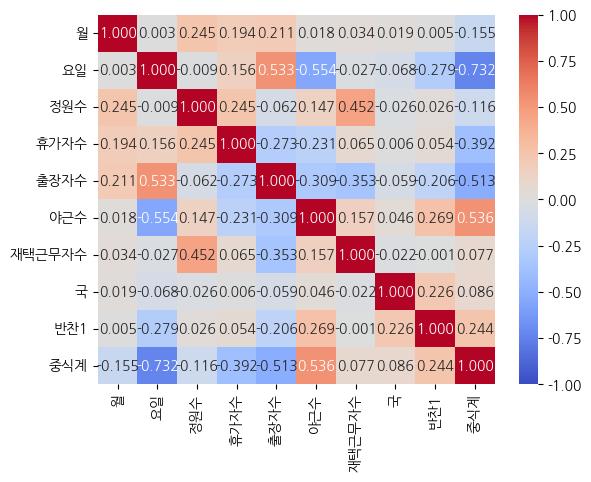

In [74]:
import seaborn as sns
corr_lunch = train_lunch.corr()
sns.heatmap(corr_lunch, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.03f', 
            vmin=-1,
            vmax=1
           );

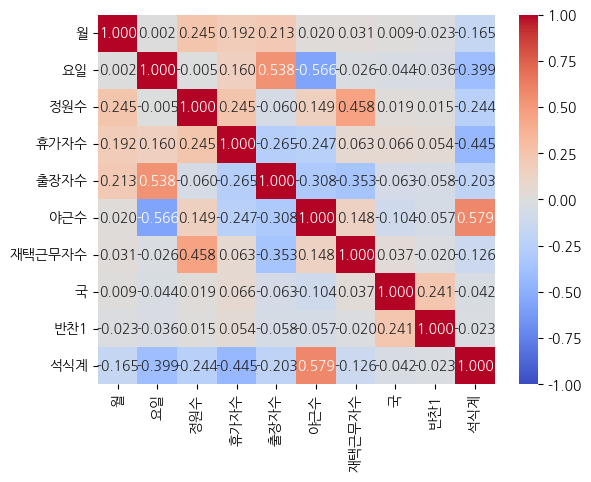

In [75]:
import seaborn as sns
corr_dinner = train_dinner.corr()
sns.heatmap(corr_dinner, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.03f', 
            vmin=-1,
            vmax=1
           );

### 머신러닝 돌리기

## test_set 메뉴 분해

In [76]:
test_set

,월,dow,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,1,3,2983,88,182,5,358,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,1,4,2983,104,212,409,348,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,1,5,2983,270,249,0,294,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2,1,2924,108,154,538,322,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2,2,2924,62,186,455,314,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2,3,2924,59,199,5,286,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2,4,2924,61,211,476,288,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2,5,2924,169,252,0,256,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2,1,2924,88,174,690,329,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2,2,2924,94,183,542,329,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


#### test 중식

In [77]:
lunch_menu_list =[]

for no in range (0, 50):
    menu = pd.DataFrame(test_set['중식메뉴'].str.split()[no])
    menu = menu[(menu[0].str.contains('\(')==False) | (menu[0].str.contains('\)') == False)]

    lunch_menu_list.append(menu.reset_index().drop(columns='index').T)
    
lunch_menu_test = pd.concat(lunch_menu_list)
lunch_menu_test = lunch_menu_test.reset_index().drop(columns='index')
lunch_menu_test.columns = ['밥', '국', '메인메뉴', '서브메뉴', '반찬1', '반찬2', '반찬3']
lunch_menu_test

,밥,국,메인메뉴,서브메뉴,반찬1,반찬2,반찬3
0,쌀밥/흑미밥/찰현미밥,대구지리,매운돈갈비찜,오꼬노미계란말이,상추무침,포기김치,양상추샐러드*딸기D
1,쌀밥/보리밥/찰현미밥,우렁된장찌개,오리주물럭,청양부추전,수제삼색무쌈,겉절이김치,양상추샐러드*오미자D
2,쌀밥/흑미밥/찰현미밥,팽이장국,수제돈까스*소스,가자미조림,동초나물무침,포기김치,양상추샐러드*파인요거트D
3,쌀밥/흑미밥/찰현미밥,배추들깨국,오리대패불고기,시금치프리타타,부추고추장무침,포기김치,양상추샐러드*망고D
4,쌀밥/팥밥/찰현미밥,부대찌개,닭살데리야끼조림,버섯탕수,세발나물무침,알타리김치/사과푸딩,양상추샐러드*오리엔탈D
5,쌀밥/흑미밥/찰현미밥,아욱국,매콤해물볶음,감자조림,미나리나물,포기김치,콥샐러드*렌치D
6,쌀밥/차조밥/찰현미밥,설렁탕,고등어김치말이찜,볼어묵굴소스볶음,브로콜리숙회*초장,석박지,양상추샐러드*키위D
7,쌀밥/흑미밥/찰현미밥,북엇국,닭볶음탕,채소전*장,솎음열무나물무침,포기김치,양상추샐러드*황도D
8,쌀밥/흑미밥/찰현미밥,감자양파국,돈수육*씨앗쌈장,매콤어묵볶음,콩나물파채무침,포기김치,양상추샐러드*자몽D
9,쌀밥/기장밥/찰현미밥,장각백숙,적어양념장구이,채소스틱*쌈장,도라지오이초무침,겉절이김치,양상추샐러드*참깨D


In [78]:
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('돈갈비|보쌈|돈삼겹|깐풍육|돈수육|삼겹살|등갈비|오향장육|목살|동파|제육|바베큐|탕수육|돈육|돼지'),
                 '메인메뉴범주'] = '돼지'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('소갈비|쇠고기|육전|불고기|차돌|소고기|떡갈비'),
                 '메인메뉴범주'] = '소'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('닭|장각|치킨|유린기|깐풍기'),
                 '메인메뉴범주'] = '닭'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('오리'),
                 '메인메뉴범주'] = '오리'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('해물|굴비|새우|고등어|적어|생선|삼치|갈치|가자미|오징어|코다리|탕수어|꽁치'),
                 '메인메뉴범주'] = '해물'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('장어|주꾸미|류산슬|유산슬|낙지|쭈꾸미'),
                 '메인메뉴범주'] = '특해물'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('돈까스|수제|함박|미트볼'),
                 '메인메뉴범주'] = '돈까스'
lunch_menu_test.loc[lunch_menu_test['메인메뉴'].str.contains('떡'),
                 '메인메뉴범주'] = '떡'
lunch_menu_test['메인메뉴범주'] = lunch_menu_test['메인메뉴범주'].fillna('기타')

lunch_menu_test.loc[lunch_menu_test['국']
                  .str.contains('김치|장국|떡국|호박|청국|근대|만두|콩|시래기|버섯|배추|감자양파|미소시루|팽이|김칫|옥수수|크림스프|토란|감자국|미역미|옹심이|미소국|유부|가쯔오|우거지|계란|수제비|얼갈|연두부|시금치|무채|미역국|들깨|냉국|도토리|우무묵|순두부|아욱국|된장|콩나물|부대|고추|쑥|맑은|쪽파|들깨탕'),
                 '국범주'] = '노멀'
lunch_menu_test.loc[lunch_menu_test['국'].str.contains('오징어|꽃게|대구|황태|불낙찌개|바지락|조개|짬뽕|나가사끼|제첩|조갯|미니짬뽕|홍합|동태|돈신|북엇|새우|북어|알탕|어묵'),
                 '국범주'] = '해산물'
lunch_menu_test.loc[lunch_menu_test['국'].str.contains('쇠고기|차돌|사골우거지|순등뼈탕|나주|순대|닭|갈비|돼지|감자탕|설렁|소고기|육개장'),
                 '국범주'] = '고기국'
lunch_menu_test.loc[lunch_menu_test['국'].str.contains('냉메밀|국수|우동'),
                 '국범주'] = '국수'
lunch_menu_test.loc[lunch_menu_test['국'].str.contains('한방갈비탕|삼계|백숙|인도커리|쌀찹'),
                 '국범주'] = '스페셜'
lunch_menu_test['국범주'] = lunch_menu_test['국범주'].fillna('기타')


In [79]:
temp = {'돈까스' : 1, '해물':2, '기타':3,'떡':4, '닭':5, '특해물':6, '돼지':7, '소':8, '오리':9}
for key, value in temp.items() :

    lunch_menu_test.loc[lunch_menu_test['메인메뉴범주'] == key , '반찬1_범주값'] = int(value)
    
temp = {'기타' : 1, '국수':2, '고기국':3,'노멀':4, '해산물':5, '스페셜':6}
for key, value in temp.items() :
    lunch_menu_test.loc[lunch_menu_test['국범주'] == key , '국_범주값'] = int(value)
    
lunch_menu_test

,밥,국,메인메뉴,서브메뉴,반찬1,반찬2,반찬3,메인메뉴범주,국범주,반찬1_범주값,국_범주값
0,쌀밥/흑미밥/찰현미밥,대구지리,매운돈갈비찜,오꼬노미계란말이,상추무침,포기김치,양상추샐러드*딸기D,돼지,해산물,7.0,5.0
1,쌀밥/보리밥/찰현미밥,우렁된장찌개,오리주물럭,청양부추전,수제삼색무쌈,겉절이김치,양상추샐러드*오미자D,오리,노멀,9.0,4.0
2,쌀밥/흑미밥/찰현미밥,팽이장국,수제돈까스*소스,가자미조림,동초나물무침,포기김치,양상추샐러드*파인요거트D,돈까스,노멀,1.0,4.0
3,쌀밥/흑미밥/찰현미밥,배추들깨국,오리대패불고기,시금치프리타타,부추고추장무침,포기김치,양상추샐러드*망고D,오리,노멀,9.0,4.0
4,쌀밥/팥밥/찰현미밥,부대찌개,닭살데리야끼조림,버섯탕수,세발나물무침,알타리김치/사과푸딩,양상추샐러드*오리엔탈D,닭,노멀,5.0,4.0
5,쌀밥/흑미밥/찰현미밥,아욱국,매콤해물볶음,감자조림,미나리나물,포기김치,콥샐러드*렌치D,해물,노멀,2.0,4.0
6,쌀밥/차조밥/찰현미밥,설렁탕,고등어김치말이찜,볼어묵굴소스볶음,브로콜리숙회*초장,석박지,양상추샐러드*키위D,해물,고기국,2.0,3.0
7,쌀밥/흑미밥/찰현미밥,북엇국,닭볶음탕,채소전*장,솎음열무나물무침,포기김치,양상추샐러드*황도D,닭,해산물,5.0,5.0
8,쌀밥/흑미밥/찰현미밥,감자양파국,돈수육*씨앗쌈장,매콤어묵볶음,콩나물파채무침,포기김치,양상추샐러드*자몽D,돼지,노멀,7.0,4.0
9,쌀밥/기장밥/찰현미밥,장각백숙,적어양념장구이,채소스틱*쌈장,도라지오이초무침,겉절이김치,양상추샐러드*참깨D,해물,스페셜,2.0,6.0


In [80]:
test_set.columns = ['월', '요일', '정원수', '휴가자수', '출장자수', 
                    '야근수', '재택근무자수', '중식메뉴', '석식메뉴']

test_lunch = test_set.drop(columns=['중식메뉴', '석식메뉴'])
test_lunch[['국', '반찬1']] = lunch_menu_test[['국_범주값', '반찬1_범주값']]
test_lunch = test_lunch.astype(int)
test_lunch

,월,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,국,반찬1
0,1,3,2983,88,182,5,358,5,7
1,1,4,2983,104,212,409,348,4,9
2,1,5,2983,270,249,0,294,4,1
3,2,1,2924,108,154,538,322,4,9
4,2,2,2924,62,186,455,314,4,5
5,2,3,2924,59,199,5,286,4,2
6,2,4,2924,61,211,476,288,3,2
7,2,5,2924,169,252,0,256,5,5
8,2,1,2924,88,174,690,329,4,7
9,2,2,2924,94,183,542,329,6,2


#### test 석식

In [81]:
dinner_menu_list =[]

for no in range (0, 50):
    menu = pd.DataFrame(test_set['석식메뉴'].str.split()[no])
    menu = menu[(menu[0].str.contains('\(')==False) | (menu[0].str.contains('\)') == False)]

    dinner_menu_list.append(menu.reset_index().drop(columns='index').T)
    
dinner_menu_test = pd.concat(dinner_menu_list)
dinner_menu_test = dinner_menu_test.reset_index().drop(columns='index')
dinner_menu_test.columns = ['밥', '국', '메인메뉴', '서브메뉴', '반찬1', '반찬2', '반찬3']
dinner_menu_test

,밥,국,메인메뉴,서브메뉴,반찬1,반찬2,반찬3
0,흑미밥,얼큰순두부찌개,쇠고기우엉볶음,버섯햄볶음,포기김치,NaN,NaN
1,충무김밥,우동국물,오징어무침,꽃맛살샐러드,얼갈이쌈장무침,석박지,NaN
2,흑미밥,물만둣국,카레찜닭,숯불양념꼬지어묵,꼬시래기무침,포기김치,NaN
3,흑미밥,동태탕,돈육꽈리고추장조림,당면채소무침,모자반무침,포기김치,NaN
4,흑미밥,바지락살국,쇠고기청경채볶음,두부구이*볶은김치,머위된장무침,백김치,NaN
5,오므라이스,가쓰오장국,빌소세지구이*구운채소,단감치커리무침,양념고추지,겉절이김치,NaN
6,흑미밥,계란파국,돈육두루치기,감자채파프리카볶음,세발나물오리엔탈무침,포기김치,NaN
7,유부초밥/추가밥,온메밀소바,국물떡볶이,순대찜*소금,청경채겉절이,포기김치,NaN
8,흑미밥,냉이국,반반치킨,꼬막채소무침,청경채찜,포기김치,NaN
9,흑미밥,미역국,매운소불고기,단호박두부탕수,메추리알장조림,석박지,NaN


In [82]:
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('돈갈비|보쌈|돈삼겹|깐풍육|돈수육|삼겹살|등갈비|오향장육|목살|동파|제육|바베큐|탕수육|돈육|돼지'),
                 '메인메뉴범주'] = '돼지'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('소갈비|쇠고기|육전|불고기|차돌|소고기|떡갈비'),
                 '메인메뉴범주'] = '소'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('닭|장각|치킨|유린기|깐풍기'),
                 '메인메뉴범주'] = '닭'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('오리'),
                 '메인메뉴범주'] = '오리'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('해물|굴비|새우|고등어|적어|생선|삼치|갈치|가자미|오징어|코다리|탕수어|꽁치'),
                 '메인메뉴범주'] = '해물'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('장어|주꾸미|류산슬|유산슬|낙지|쭈꾸미'),
                 '메인메뉴범주'] = '특해물'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('돈까스|수제|함박|미트볼'),
                 '메인메뉴범주'] = '돈까스'
dinner_menu_test.loc[dinner_menu_test['메인메뉴'].str.contains('떡'),
                 '메인메뉴범주'] = '떡'
dinner_menu_test['메인메뉴범주'] = dinner_menu_test['메인메뉴범주'].fillna('기타')

dinner_menu_test.loc[dinner_menu_test['국']
                  .str.contains('김치|장국|떡국|호박|청국|근대|만두|콩|시래기|버섯|배추|감자양파|미소시루|팽이|김칫|옥수수|크림스프|토란|감자국|미역미|옹심이|미소국|유부|가쯔오|우거지|계란|수제비|얼갈|연두부|시금치|무채|미역국|들깨|냉국|도토리|우무묵|순두부|아욱국|된장|콩나물|부대|고추|쑥|맑은|쪽파|들깨탕'),
                 '국범주'] = '노멀'
dinner_menu_test.loc[dinner_menu_test['국'].str.contains('오징어|꽃게|대구|황태|불낙찌개|바지락|조개|짬뽕|나가사끼|제첩|조갯|미니짬뽕|홍합|동태|돈신|북엇|새우|북어|알탕|어묵'),
                 '국범주'] = '해산물'
dinner_menu_test.loc[dinner_menu_test['국'].str.contains('쇠고기|차돌|사골우거지|순등뼈탕|나주|순대|닭|갈비|돼지|감자탕|설렁|소고기|육개장'),
                 '국범주'] = '고기국'
dinner_menu_test.loc[dinner_menu_test['국'].str.contains('냉메밀|국수|우동'),
                 '국범주'] = '국수'
dinner_menu_test.loc[dinner_menu_test['국'].str.contains('한방갈비탕|삼계|백숙|인도커리|쌀찹'),
                 '국범주'] = '스페셜'
dinner_menu_test['국범주'] = dinner_menu_test['국범주'].fillna('기타')

In [83]:
dinner_menu_test

,밥,국,메인메뉴,서브메뉴,반찬1,반찬2,반찬3,메인메뉴범주,국범주
0,흑미밥,얼큰순두부찌개,쇠고기우엉볶음,버섯햄볶음,포기김치,NaN,NaN,소,노멀
1,충무김밥,우동국물,오징어무침,꽃맛살샐러드,얼갈이쌈장무침,석박지,NaN,해물,국수
2,흑미밥,물만둣국,카레찜닭,숯불양념꼬지어묵,꼬시래기무침,포기김치,NaN,닭,기타
3,흑미밥,동태탕,돈육꽈리고추장조림,당면채소무침,모자반무침,포기김치,NaN,돼지,해산물
4,흑미밥,바지락살국,쇠고기청경채볶음,두부구이*볶은김치,머위된장무침,백김치,NaN,소,해산물
5,오므라이스,가쓰오장국,빌소세지구이*구운채소,단감치커리무침,양념고추지,겉절이김치,NaN,기타,노멀
6,흑미밥,계란파국,돈육두루치기,감자채파프리카볶음,세발나물오리엔탈무침,포기김치,NaN,돼지,노멀
7,유부초밥/추가밥,온메밀소바,국물떡볶이,순대찜*소금,청경채겉절이,포기김치,NaN,떡,기타
8,흑미밥,냉이국,반반치킨,꼬막채소무침,청경채찜,포기김치,NaN,닭,기타
9,흑미밥,미역국,매운소불고기,단호박두부탕수,메추리알장조림,석박지,NaN,소,노멀


In [84]:
temp = {'돈까스' : 1, '해물':2, '기타':3,'떡':4, '닭':5, '특해물':6, '돼지':7, '소':8, '오리':9}
for key, value in temp.items() :

    dinner_menu_test.loc[dinner_menu_test['메인메뉴범주'] == key , '반찬1_범주값'] = int(value)
    
temp = {'기타' : 1, '국수':2, '고기국':3,'노멀':4, '해산물':5, '스페셜':6}
for key, value in temp.items() :
    dinner_menu_test.loc[dinner_menu_test['국범주'] == key , '국_범주값'] = int(value)
    
dinner_menu_test

,밥,국,메인메뉴,서브메뉴,반찬1,반찬2,반찬3,메인메뉴범주,국범주,반찬1_범주값,국_범주값
0,흑미밥,얼큰순두부찌개,쇠고기우엉볶음,버섯햄볶음,포기김치,NaN,NaN,소,노멀,8.0,4.0
1,충무김밥,우동국물,오징어무침,꽃맛살샐러드,얼갈이쌈장무침,석박지,NaN,해물,국수,2.0,2.0
2,흑미밥,물만둣국,카레찜닭,숯불양념꼬지어묵,꼬시래기무침,포기김치,NaN,닭,기타,5.0,1.0
3,흑미밥,동태탕,돈육꽈리고추장조림,당면채소무침,모자반무침,포기김치,NaN,돼지,해산물,7.0,5.0
4,흑미밥,바지락살국,쇠고기청경채볶음,두부구이*볶은김치,머위된장무침,백김치,NaN,소,해산물,8.0,5.0
5,오므라이스,가쓰오장국,빌소세지구이*구운채소,단감치커리무침,양념고추지,겉절이김치,NaN,기타,노멀,3.0,4.0
6,흑미밥,계란파국,돈육두루치기,감자채파프리카볶음,세발나물오리엔탈무침,포기김치,NaN,돼지,노멀,7.0,4.0
7,유부초밥/추가밥,온메밀소바,국물떡볶이,순대찜*소금,청경채겉절이,포기김치,NaN,떡,기타,4.0,1.0
8,흑미밥,냉이국,반반치킨,꼬막채소무침,청경채찜,포기김치,NaN,닭,기타,5.0,1.0
9,흑미밥,미역국,매운소불고기,단호박두부탕수,메추리알장조림,석박지,NaN,소,노멀,8.0,4.0


In [85]:
test_set.columns = ['월', '요일', '정원수', '휴가자수', '출장자수', 
                    '야근수', '재택근무자수', '중식메뉴', '석식메뉴']

test_dinner = test_set.drop(columns=['중식메뉴', '석식메뉴'])
test_dinner[['국', '반찬1']] = dinner_menu_test[['국_범주값', '반찬1_범주값']]
test_dinner = test_dinner.astype(int)
test_dinner

,월,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,국,반찬1
0,1,3,2983,88,182,5,358,4,8
1,1,4,2983,104,212,409,348,2,2
2,1,5,2983,270,249,0,294,1,5
3,2,1,2924,108,154,538,322,5,7
4,2,2,2924,62,186,455,314,5,8
5,2,3,2924,59,199,5,286,4,3
6,2,4,2924,61,211,476,288,4,7
7,2,5,2924,169,252,0,256,1,4
8,2,1,2924,88,174,690,329,1,5
9,2,2,2924,94,183,542,329,4,8


In [86]:
train_lunch.to_csv('train_lunch_sw.csv')
train_dinner.to_csv('train_dinner_sw.csv')
test_lunch.to_csv('test_lunch_sw.csv')
test_dinner.to_csv('test_dinner_sw.csv')


## 머신러닝

#### 중식계

In [132]:
train_dinner

,월,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,국,반찬1,석식계
0,2,1,2601,50,150,238,0,3,2,331
1,2,2,2601,50,173,319,0,5,6,560
2,2,3,2601,56,180,111,0,4,2,573
3,2,4,2601,104,220,355,0,2,3,525
4,2,5,2601,278,181,34,0,3,5,330
...,...,...,...,...,...,...,...,...,...,...
1156,1,3,2983,75,198,4,391,2,3,421
1157,1,4,2983,92,231,462,351,3,2,353
1158,1,5,2983,255,248,1,303,4,1,217
1159,1,1,2983,107,153,616,327,4,6,502


In [133]:
from autogluon.tabular import TabularPredictor

In [134]:
train_lunch.columns

Index(['월', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수', '국', '반찬1', '중식계'], dtype='object')

In [135]:
list(train_lunch.columns)

['월', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수', '국', '반찬1', '중식계']

In [136]:
from autogluon.tabular import TabularPredictor

label_lunch = '중식계'

predictors = list(train_lunch.columns)
predictors.remove(label_lunch)

predictor = TabularPredictor(label=label_lunch,
                             problem_type='regression',
                             eval_metric='mean_absolute_error'
                            ).fit(train_data=train_lunch)

lunch_pred = predictor.predict(test_lunch)

No path specified. Models will be saved in: "AutogluonModels\ag-20230404_072506\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230404_072506\"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    1205
Train Data Columns: 9
Label Column: 중식계
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4736.24 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Typ

In [137]:
print(predictor.leaderboard(silent = True)) 

                  model  score_val  pred_time_val   fit_time  \
0   WeightedEnsemble_L2 -58.999054       0.012966   7.870099   
1              CatBoost -59.254864       0.001999   3.167090   
2            LightGBMXT -61.608363       0.006980   3.746394   
3               XGBoost -64.420953       0.003987   0.661396   
4              LightGBM -66.561943       0.002992   0.640288   
5       RandomForestMSE -67.274413       0.053854   0.723067   
6         LightGBMLarge -67.512045       0.004989   2.362027   
7         ExtraTreesMSE -68.990899       0.048870   0.488693   
8       NeuralNetFastAI -70.654690       0.007979   3.565888   
9        NeuralNetTorch -72.444715       0.011968  15.167164   
10       KNeighborsDist -95.402303       0.002988   0.009976   
11       KNeighborsUnif -98.268879       0.003013   4.411044   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000000           0.295218            2       True   
1                 0.0

In [138]:
predictor.feature_importance(train_lunch)

Computing feature importance via permutation shuffling for 9 features using 1205 rows with 5 shuffle sets...
	3.74s	= Expected runtime (0.75s per shuffle set)
	1.48s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
출장자수,63.806031,1.649504,5.355021e-08,5,67.202383,60.409679
요일,56.226768,1.143867,2.054336e-08,5,58.582007,53.871530
휴가자수,45.988786,1.087945,3.755578e-08,5,48.228879,43.748692
야근수,36.034897,1.076745,9.554823e-08,5,38.251930,33.817865
월,17.843971,0.511263,8.078251e-08,5,18.896669,16.791274
정원수,14.643582,0.589358,3.141741e-07,5,15.857078,13.430087
재택근무자수,7.854694,0.221523,7.583690e-08,5,8.310813,7.398575
반찬1,5.210336,0.143383,6.875010e-08,5,5.505564,4.915108
국,2.475323,0.095452,2.648094e-07,5,2.671860,2.278786


In [140]:
model_to_use = predictor.get_model_best()
lunch_pred = predictor.predict(test_lunch, model=model_to_use)

submission = pd.read_csv('data/sample_submission.csv')

submission['중식계'] = lunch_pred

#### 석식계 

In [141]:
label_dinner = '석식계'

predictors = list(train_dinner.columns)
predictors.remove(label_dinner)

predictor = TabularPredictor(label=label_dinner, 
                             eval_metric='mean_absolute_error'
                            ).fit(train_data=train_dinner
                                 )

dinner_pred = predictor.predict(test_dinner)

No path specified. Models will be saved in: "AutogluonModels\ag-20230404_072738\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230404_072738\"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    1161
Train Data Columns: 9
Label Column: 석식계
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (905, 104, 478.88717, 109.12342)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4460.88 MB
	Train Data (Original)  Memory Usage:

In [142]:
print(predictor.leaderboard(silent = True)) 

                  model  score_val  pred_time_val   fit_time  \
0   WeightedEnsemble_L2 -43.160718       0.105244  22.707343   
1              LightGBM -44.911502       0.002991   0.657753   
2              CatBoost -44.947397       0.001996   2.597836   
3            LightGBMXT -45.694772       0.002993   0.677048   
4               XGBoost -45.996969       0.005985   0.734605   
5       RandomForestMSE -46.758056       0.046876   0.610366   
6         ExtraTreesMSE -47.013391       0.073321   0.896117   
7        NeuralNetTorch -47.466638       0.009973  16.786931   
8         LightGBMLarge -48.514899       0.007989   2.788497   
9       NeuralNetFastAI -49.668203       0.011967   2.005398   
10       KNeighborsDist -50.526079       0.003991   0.019947   
11       KNeighborsUnif -50.786264       0.003994   0.011968   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000000           0.325139            2       True   
1                 0.0

In [143]:
predictor.feature_importance(train_dinner)

Computing feature importance via permutation shuffling for 9 features using 1161 rows with 5 shuffle sets...
	16.66s	= Expected runtime (3.33s per shuffle set)
	3.75s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
야근수,49.468167,0.750303,6.348785e-09,5,51.013050,47.923283
휴가자수,23.691236,0.593646,4.726917e-08,5,24.913562,22.468910
출장자수,20.254461,0.118275,1.395227e-10,5,20.497990,20.010932
정원수,15.839833,0.589360,2.295620e-07,5,17.053333,14.626333
재택근무자수,14.897419,0.983888,2.269854e-06,5,16.923258,12.871580
월,14.259205,0.214179,6.106305e-09,5,14.700203,13.818207
요일,6.451525,0.428527,2.322163e-06,5,7.333868,5.569183
반찬1,4.041739,0.154399,2.550593e-07,5,4.359648,3.723829
국,1.931634,0.089116,5.420895e-07,5,2.115125,1.748143


In [144]:
model_to_use = predictor.get_model_best()
dinner_pred = predictor.predict(test_dinner, model=model_to_use)

submission['석식계'] = dinner_pred

## 제출

In [145]:
submission.to_csv('data/3_1_submission.csv', index=False, encoding="utf-8")

In [146]:
submission

,일자,중식계,석식계
0,2021-01-27,994.235962,389.738892
1,2021-01-28,924.555054,405.962280
2,2021-01-29,644.392639,283.585846
3,2021-02-01,1193.540771,555.830261
4,2021-02-02,969.669556,431.443176
5,2021-02-03,912.540527,436.993042
6,2021-02-04,900.819519,429.529816
7,2021-02-05,645.128540,360.552063
8,2021-02-08,1170.769287,593.341370
9,2021-02-09,1083.379883,481.407715
